In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
# import seaborn as sns

In [3]:
data = loadmat('./data/ex7data2.mat')

In [4]:
K = 3 # Number of Clusters

In [5]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [6]:
X = data['X']

In [7]:
def plot_data_points(X):
    X1 = X[:,0]
    X2 = X[:,1]
    plt.scatter(X1, X2, c='r', linewidths=2, cmap='plasma')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

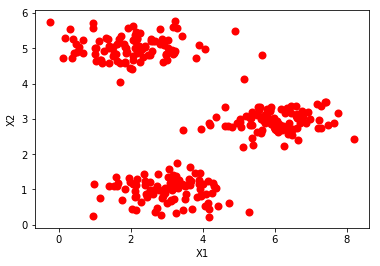

In [8]:
plot_data_points(X)

In [9]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) 

In [37]:
def find_closest_centroids(X, initial_centroids):
    closest_centroids = np.zeros((X.shape[0], 1))
#Vectorized Approach
    distance_matrix = np.zeros((X.shape[0], initial_centroids.shape[0]))
    for i in range(len(initial_centroids)):
#         print(np.power(X - initial_centroids[i], 2).shape)
#         print(np.sqrt(np.sum(np.power(X - initial_centroids[i], 2), axis=1)).shape)
        distance_matrix[:, i] = np.sqrt(np.sum(np.power(X - initial_centroids[i], 2), axis=1))
    closest_centroids = np.argmin(distance_matrix, axis=1)
    return closest_centroids
# Unvectorized Approach
#     for i in range(len(X)):
#         dist = np.zeros((initial_centroids.shape[0], 1))
#         index = 0
#         for centroid in initial_centroids:
#             dist[index] = np.sqrt(np.power((X[i, 0] - centroid[0]), 2) + np.power((X[i, 1] - centroid[1]), 2))
#             index += 1
#         closest_centroids[i] = np.argmin(dist)
#     return closest_centroids

In [ ]:
idx_vectorized = find_closest_centroids(X, initial_centroids)

In [ ]:
idx_vectorized

In [ ]:
idx_vectorized

In [11]:
idx = find_closest_centroids(X, initial_centroids)

(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)


In [12]:
idx = idx.reshape((idx.shape[0], 1))

In [ ]:
idx_vectorized = idx_vectorized.reshape((idx_vectorized.shape[0], 1))

In [ ]:
idx == idx_vectorized

In [ ]:
idx.shape

In [13]:
# Computing Centroid Means to calculate new centroids

In [14]:
def compute_means(X, idx, K):
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    for i in range(K):
        cluster_i = np.where(idx.flatten()==i)
        training_examples = X[cluster_i[0],:]
        centroids[i] = np.mean(training_examples, axis=0)
    return centroids

In [15]:
centroids = compute_means(X, idx, K)

In [16]:
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [17]:
np.mean([[1,2], [1,2], [1,2]], axis=1)

array([1.5, 1.5, 1.5])

## K-Means

In [18]:
max_iter = 10

In [19]:
def plot_progress_k_means(X, centroids, previous_centroids, idx, K, iteration):
    plot_data_points(X)
#     print("Centroids Shape", centroids.shape)
    plt.plot(centroids[:,0], centroids[:,1], 'kx')
    for j in range(centroids.shape[0]):
        plt.plot(centroids[j], previous_centroids[j], 'k-')

In [36]:
def run_k_means(X, intitial_centroids, max_iter, plot_progress=False):
    K = initial_centroids.shape[0]
    m, n = X.shape
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    plt.figure()
    for i in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        
        if (plot_progress):
            print("Centroids", centroids)
            plot_progress_k_means(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        
        centroids = compute_means(X, idx, K)
    return (centroids, idx)
    

(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[3 3]
 [6 2]
 [8 5]]


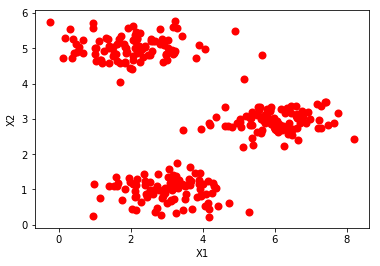

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


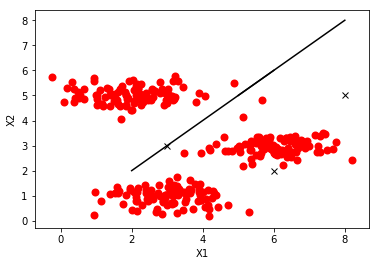

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[2.31325526 3.22830617]
 [5.33273768 2.43159599]
 [6.8653618  3.23293995]]


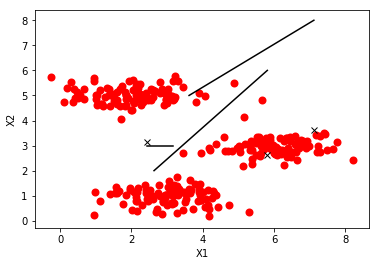

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[2.19692479 3.42136707]
 [4.83555397 2.12976745]
 [6.6560054  3.0751355 ]]


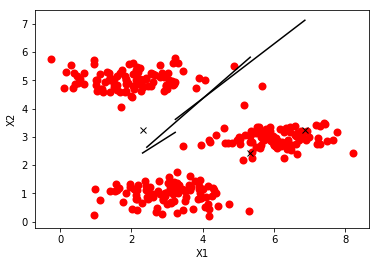

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.98241171 4.0250785 ]
 [3.91150763 1.47060546]
 [6.34008592 3.05366642]]


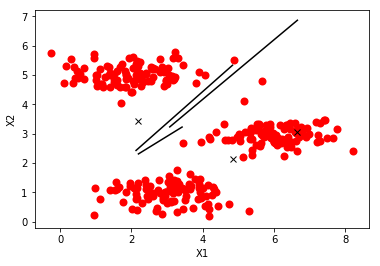

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]


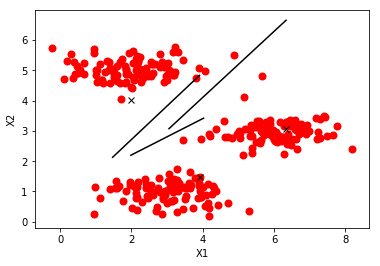

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


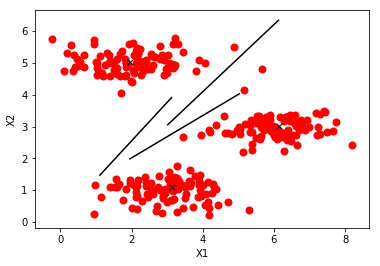

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


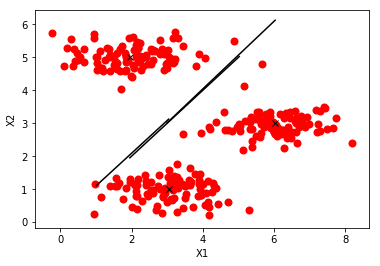

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


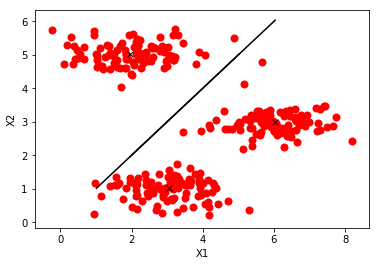

Centroids Shape (3, 2)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
Centroids [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


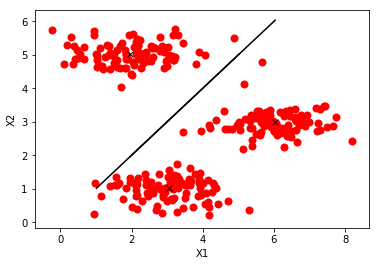

Centroids Shape (3, 2)


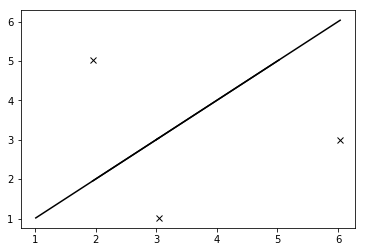

In [21]:
centroids, idx = run_k_means(X, initial_centroids, max_iter, True)

In [22]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

###  Random Initialisation

In [33]:
def k_means_init_centroids(X, K):
    initial_centroids = np.zeros((K, X.shape[1]))
    randidx = np.random.permutation(X.shape[0])
    random_input = X[randidx,:]
    initial_centroids = random_input[:K]
    return initial_centroids

In [34]:
initial_centroids = k_means_init_centroids(img, K)

In [35]:
initial_centroids.shape

(16, 3)

In [25]:
run_k_means(X, initial_centroids, max_iter, False)

(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)
(300, 2)
(300,)


(array([[1.95399466, 5.02557006],
        [3.04367119, 1.01541041],
        [6.03366736, 3.00052511]]),
 array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        

<Figure size 432x288 with 0 Axes>

## K-means to Reduce Image

#### load Image

In [56]:
img = plt.imread('./data/bird_small.png')

In [57]:
img_size = img.shape

In [58]:
img_size

(128, 128, 3)

In [ ]:
img_test = loadmat('./data/bird_small.mat') # in this pixel value ranges from 0-255, which needs to be scaled to 0-1 by dividing with 255

In [27]:
img = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [28]:
img.shape

(16384, 3)

In [29]:
K = 16
max_iter = 10

In [30]:
initial_centroids = k_means_init_centroids(img, K)
initial_centroids

array([[0.6784314 , 0.4392157 , 0.34901962],
       [0.21176471, 0.16470589, 0.10588235],
       [0.81960785, 0.73333335, 0.52156866],
       ...,
       [0.5921569 , 0.53333336, 0.54509807],
       [0.9764706 , 0.92941177, 0.7490196 ],
       [0.22745098, 0.24313726, 0.20392157]], dtype=float32)

In [38]:
initial_centroids.shape

(16, 3)

In [39]:
centroids, idx = run_k_means(img, initial_centroids, max_iter, False)

<Figure size 432x288 with 0 Axes>

In [42]:
centroids.shape

(16, 3)

In [44]:
idx = idx.reshape((idx.shape[0], 1))

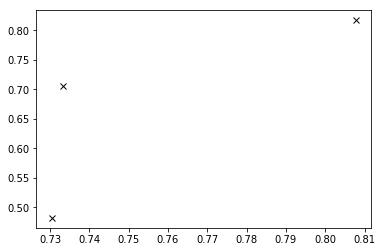

In [48]:
plt.plot(centroids[0], centroids[1], 'kx')

In [49]:
idx.shape

(16384, 1)

In [50]:
idx

array([[ 4],
       [ 1],
       [ 4],
       ...,
       [13],
       [ 9],
       [ 9]], dtype=int64)

In [52]:
img_recovered = centroids[idx, :]

In [53]:
img_recovered.shape

(16384, 1, 3)

In [59]:
img_recovered = img_recovered.reshape((img_size[0], img_size[1], 3))

In [60]:
img_recovered.shape

(128, 128, 3)

(-0.5, 127.5, 127.5, -0.5)

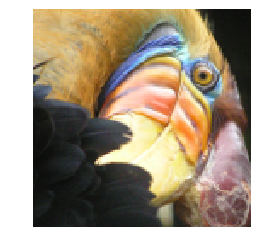

In [65]:
plt.imshow(img)  # img being reshaped to original shape
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

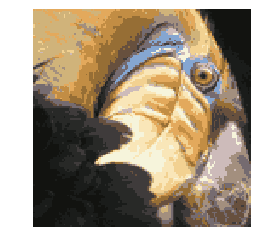

In [66]:
# Compressed Image
plt.imshow(img_recovered)
plt.axis('off')